In [57]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet
import seaborn as sns

In [58]:
path_OG_count = '../resource/Proteome/OrthoFinder/Results_Feb22/Orthogroups/Orthogroups.GeneCount.tsv'
path_singletons = '../resource/Proteome/OrthoFinder/Results_Feb22/Orthogroups/Orthogroups_UnassignedGenes.tsv'

In [59]:
output = '../image/upset_plot/upset0_3sp.png'

/var/folders/5j/q1x9hmks3l7gkv7shbkf34100000gn/T/ipykernel_33096/296213287.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_sing = df_sing.applymap(lambda x: 1 if isinstance(x, str) == True else x)
/Users/pinar/anaconda3/envs/snakemake/lib/python3.11/site-packages/upsetplot/plotting.py:660: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/pinar/anaconda3/envs/snakemake/lib/python3.11/site-packages/upsetplot/plotting.py:661: FutureWarni

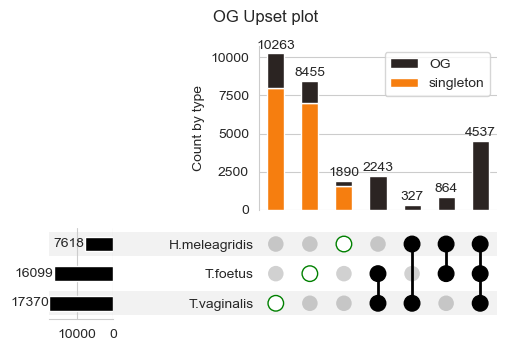

In [60]:
"OG with at least two genes"
df_count = pd.read_csv(path_OG_count, sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Single genes which are excluded from the OG"
df_sing = pd.read_csv(path_singletons, sep="\t", header='infer')
df_sing = df_sing.set_index("Orthogroup").fillna(0)
df_sing["Total"] = 1
df_sing = df_sing.applymap(lambda x: 1 if isinstance(x, str) == True else x)

"Concatanate OG and singleton dataframes"
df_count_s = pd.concat([df_count, df_sing], axis=0)
df_count_s.loc[df_count_s["Total"] > 1, "Type"] = "OG"
df_count_s.loc[df_count_s["Total"] == 1, "Type"] = "singleton"


df_count_s = df_count_s.rename(columns={"H_meleagridis_aa": "H.meleagridis",
                                        "T_foetus_aa": "T.foetus",
                                        "T_vaginalis_aa": "T.vaginalis"})

"Upset plot for both OG and singletons marked different colors"
df_stack = df_count_s.set_index(df_count_s["H.meleagridis"] >= 1). \
    set_index(df_count_s["T.foetus"] >= 1, append=True). \
    set_index(df_count_s["T.vaginalis"] >= 1, append=True)

""" plot upset0 """
upset0 = UpSet(df_stack.sort_values(by="Total", ascending=True),
               min_subset_size=10,
               intersection_plot_elements=0,
               show_counts=True)

pal = sns.dark_palette("#F67E0F", n_colors=2, reverse=False)
upset0.add_stacked_bars(by="Type",
                        colors=pal,
                        title="Count by type",
                        elements=5)

upset0.style_subsets(max_degree=1,
                     facecolor="white",
                     edgecolor="green",
                     label="Species-specific")

sns.set_style("whitegrid", {'axes.grid': False})
upset0.plot()
plt.suptitle("OG Upset plot")
plt.savefig(output, format="png", bbox_inches='tight', dpi=1200, transparent=True)
plt.show()